<a href="https://colab.research.google.com/github/Ali-mohammadi-design/6220-Project-winter-2022/blob/main/6220_PRJ_Ali_Mohammadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The heart disease data set selected for this project has been collected from an investigation carried out on 297 patients at Cleveland Clinic located Cleveland, Ohio, USA . In this data set, Variable 14 (num) is the predicted attribute. While num is one, the patient has a heart disease and when it is zero, it denotes that no heart disease has been detected. While the original database had 76 raw attributes, only 14 effective attributes are actually present in the published version of this data set and some attributes related to the personal information of the patients and other unimportant details have been omitted. All these 14 attributes have been asserted in numerical format. 

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/


In [ ]:
#read cvs file into dataframe
#df = pd.read_csv('https://raw.githubusercontent.com/myconcordia/INSE6220/main/seeds.csv')
#df.head(25)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('processed.cleveland.csv')
df.head(25)

Saving processed.cleveland.csv to processed.cleveland.csv


age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1   67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2   67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3   37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4   41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5   56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6   62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7   57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8   63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9   53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   
10  57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0      0.4   
11  56.0  0.0  2.0     140.0  294.0  0.0      2.0    153.0    0.0      1.3   
12  56.0  1.0  3.0     130.0  256.0  1.0      2.0    142.0    1.0      0.6   
13  44.0  1.0  2.0     120.0  263.0  0.0      0.0    173.0    0.0      0.0   
14  52.0  1.0  3.0     172.0  199.0  1.0      0.0    162.0    0.0      0.5   
15  57.0  1.0  3.0     150.0  168.0  0.0      0.0    174.0    0.0      1.6   
16  48.0  1.0  2.0     110.0  229.0  0.0      0.0    168.0    0.0      1.0   
17  54.0  1.0  4.0     140.0  239.0  0.0      0.0    160.0    0.0      1.2   
18  48.0  0.0  3.0     130.0  275.0  0.0      0.0    139.0    0.0      0.2   
19  49.0  1.0  2.0     130.0  266.0  0.0      0.0    171.0    0.0      0.6   
20  64.0  1.0  1.0     110.0  211.0  0.0      2.0    144.0    1.0      1.8   
21  58.0  0.0  1.0     150.0  283.0  1.0      2.0    162.0    0.0      1.0   
22  58.0  1.0  2.0     120.0  284.0  0.0      2.0    160.0    0.0      1.8   
23  58.0  1.0  3.0     132.0  224.0  0.0      2.0    173.0    0.0      3.2   
24  60.0  1.0  4.0     130.0  206.0  0.0      2.0    132.0    1.0      2.4   

    slop   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    1  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  
5    1.0  0.0   3.0    0  
6    3.0  2.0   3.0    1  
7    1.0  0.0   3.0    0  
8    2.0  1.0   7.0    1  
9    3.0  0.0   7.0    1  
10   2.0  0.0   6.0    0  
11   2.0  0.0   3.0    0  
12   2.0  1.0   6.0    1  
13   1.0  0.0   7.0    0  
14   1.0  0.0   7.0    0  
15   1.0  0.0   3.0    0  
16   3.0  0.0   7.0    1  
17   1.0  0.0   3.0    0  
18   1.0  0.0   3.0    0  
19   1.0  0.0   3.0    0  
20   2.0  0.0   3.0    0  
21   1.0  0.0   3.0    0  
22   2.0  0.0   3.0    1  
23   1.0  2.0   7.0    1  
24   2.0  2.0   7.0    1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slop      297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

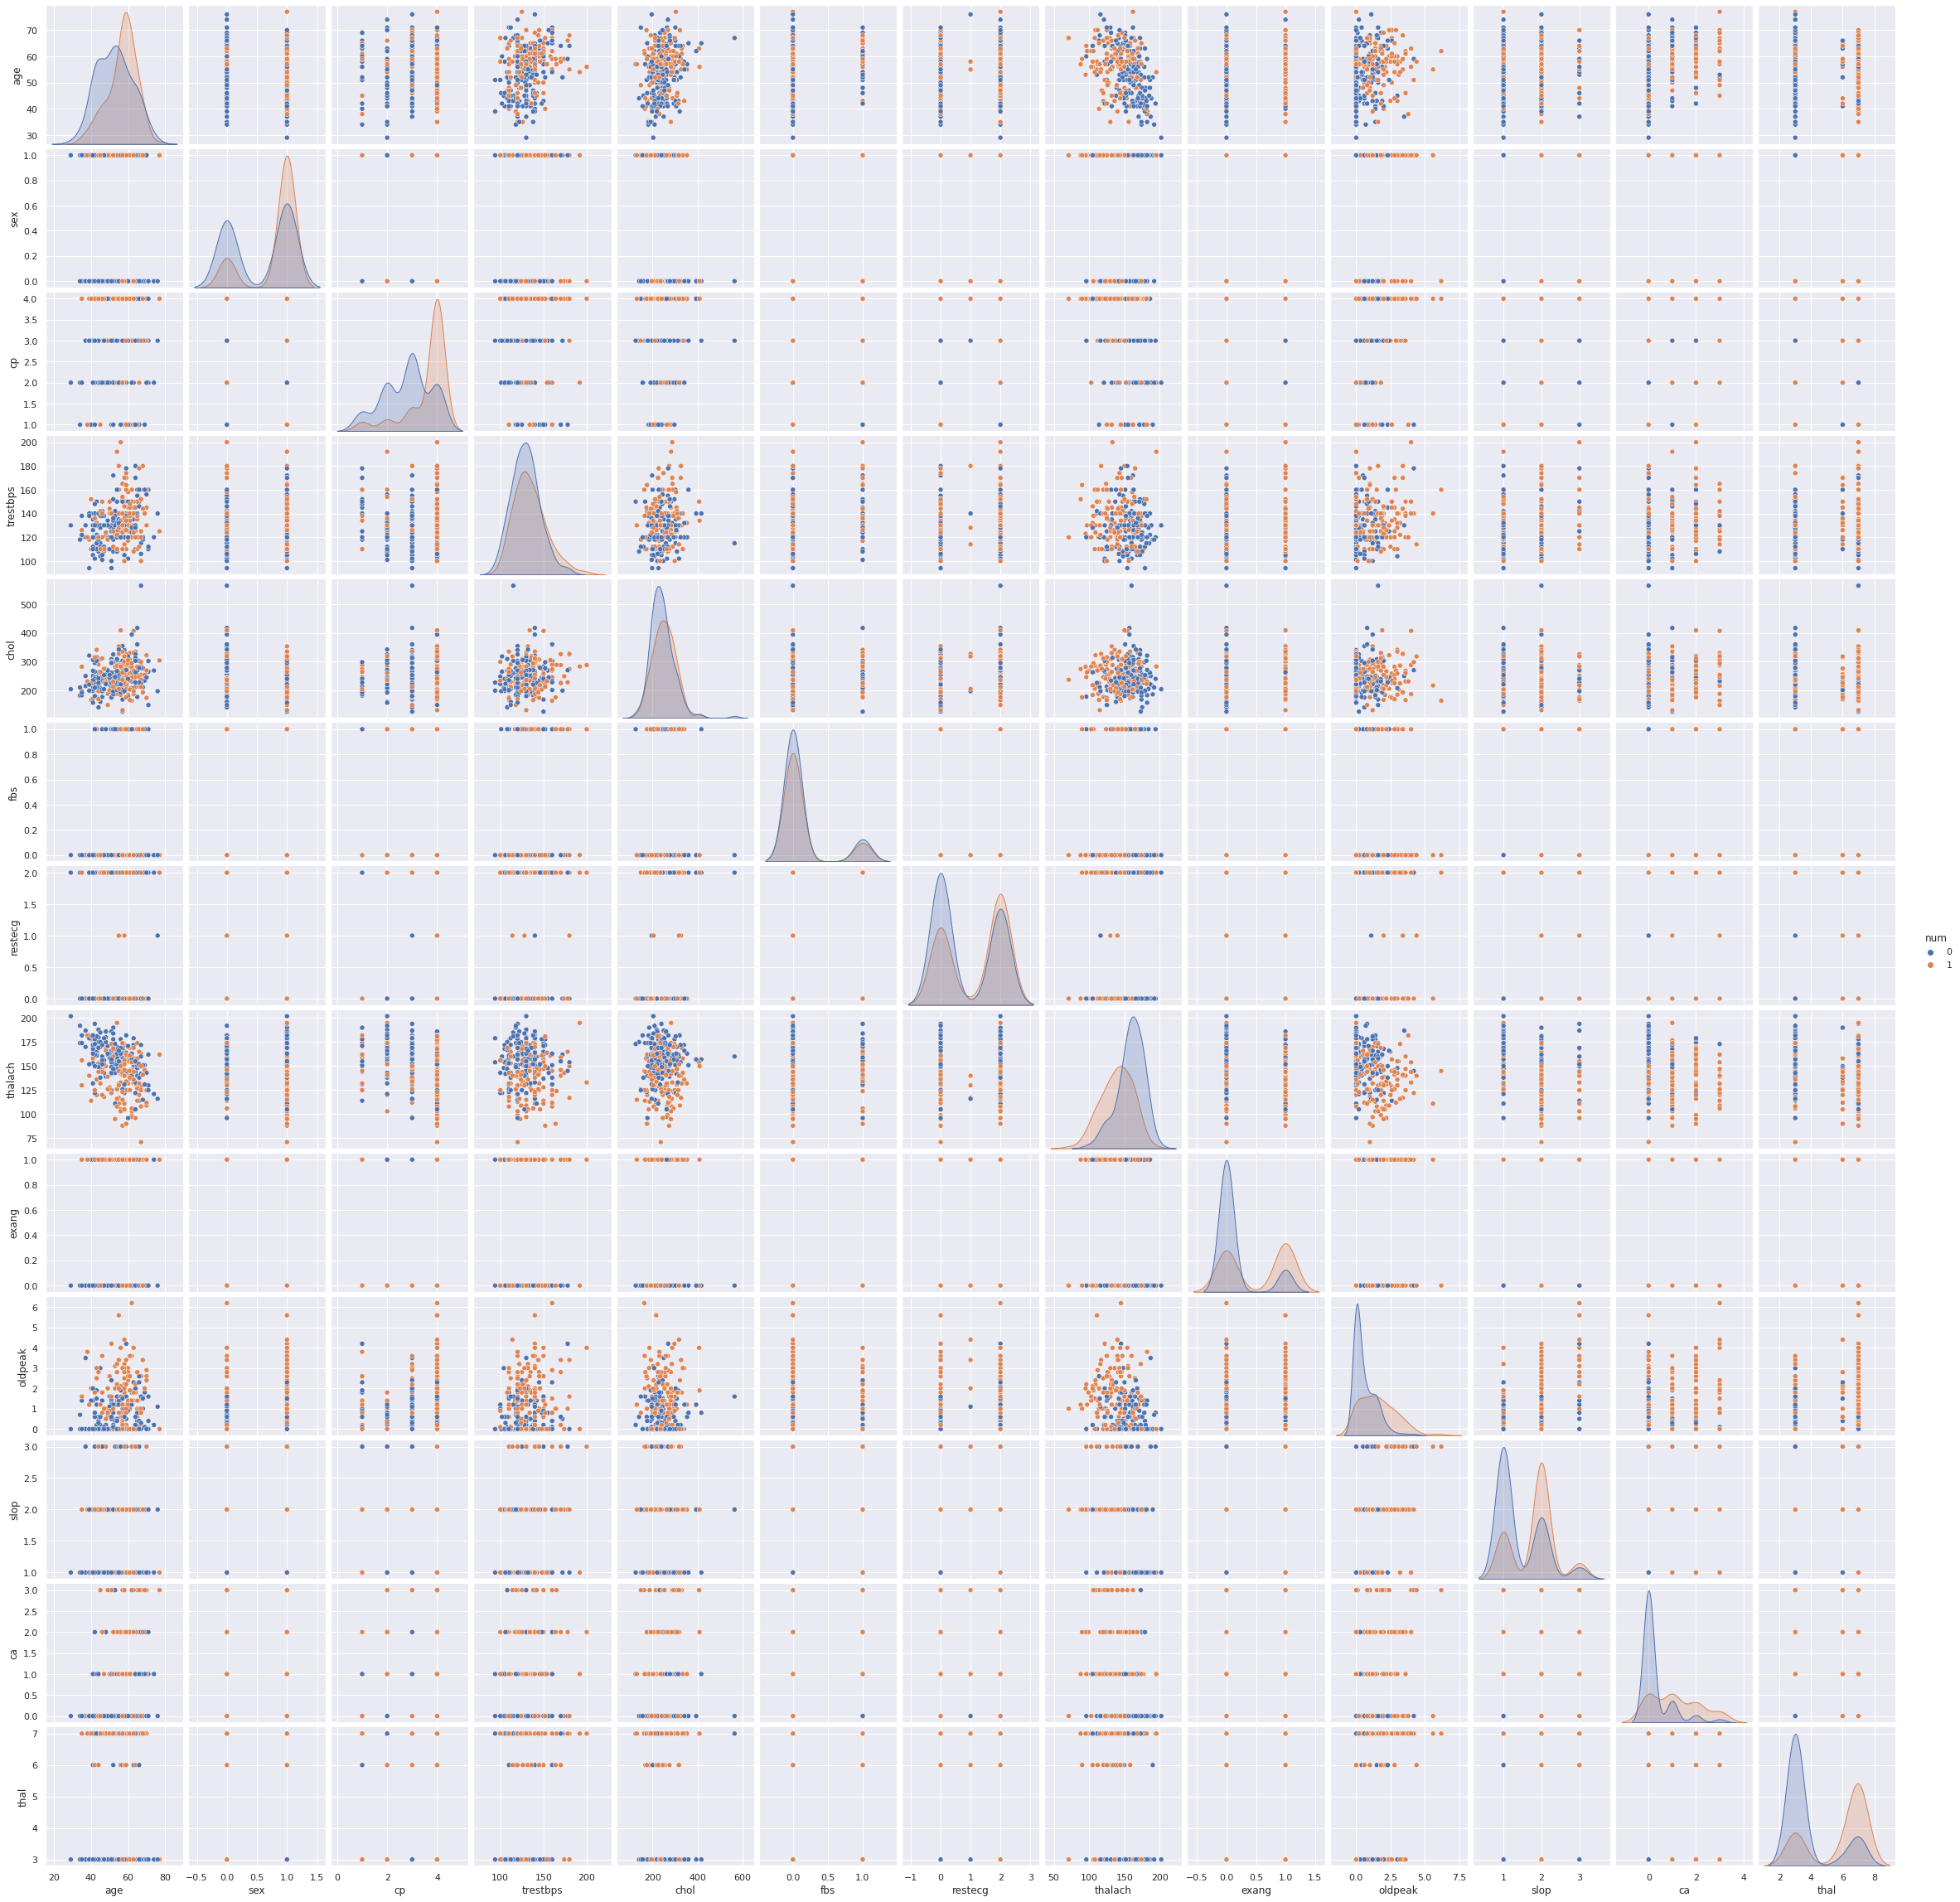

In [ ]:
sns.pairplot(df, hue='num')
plt.show()

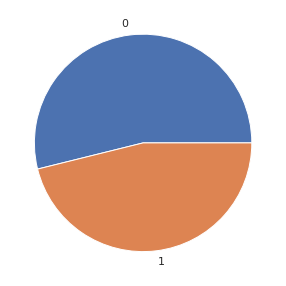

In [ ]:
y =df['num']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['num'])
X.head(10)

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   

   slop   ca  thal  
0   3.0  0.0   6.0  
1   2.0  3.0   3.0  
2   2.0  2.0   7.0  
3   3.0  0.0   3.0  
4   1.0  0.0   3.0  
5   1.0  0.0   3.0  
6   3.0  2.0   3.0  
7   1.0  0.0   3.0  
8   2.0  1.0   7.0  
9   3.0  0.0   7.0

In [ ]:
X.describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       297.0   54.542088   9.049736   29.0   48.0   56.0   61.0   77.0
sex       297.0    0.676768   0.468500    0.0    0.0    1.0    1.0    1.0
cp        297.0    3.158249   0.964859    1.0    3.0    3.0    4.0    4.0
trestbps  297.0  131.693603  17.762806   94.0  120.0  130.0  140.0  200.0
chol      297.0  247.350168  51.997583  126.0  211.0  243.0  276.0  564.0
fbs       297.0    0.144781   0.352474    0.0    0.0    0.0    0.0    1.0
restecg   297.0    0.996633   0.994914    0.0    0.0    1.0    2.0    2.0
thalach   297.0  149.599327  22.941562   71.0  133.0  153.0  166.0  202.0
exang     297.0    0.326599   0.469761    0.0    0.0    0.0    1.0    1.0
oldpeak   297.0    1.055556   1.166123    0.0    0.0    0.8    1.6    6.2
slop      297.0    1.602694   0.618187    1.0    1.0    2.0    2.0    3.0
ca        297.0    0.676768   0.938965    0.0    0.0    0.0    1.0    3.0
thal      297.0    4.730640   1.938629    3.0    3.0    3.0    7.0    7.0

In [ ]:
X.describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       297.0   54.542088   9.049736   29.0   48.0   56.0   61.0   77.0
sex       297.0    0.676768   0.468500    0.0    0.0    1.0    1.0    1.0
cp        297.0    3.158249   0.964859    1.0    3.0    3.0    4.0    4.0
trestbps  297.0  131.693603  17.762806   94.0  120.0  130.0  140.0  200.0
chol      297.0  247.350168  51.997583  126.0  211.0  243.0  276.0  564.0
fbs       297.0    0.144781   0.352474    0.0    0.0    0.0    0.0    1.0
restecg   297.0    0.996633   0.994914    0.0    0.0    1.0    2.0    2.0
thalach   297.0  149.599327  22.941562   71.0  133.0  153.0  166.0  202.0
exang     297.0    0.326599   0.469761    0.0    0.0    0.0    1.0    1.0
oldpeak   297.0    1.055556   1.166123    0.0    0.0    0.8    1.6    6.2
slop      297.0    1.602694   0.618187    1.0    1.0    2.0    2.0    3.0
ca        297.0    0.676768   0.938965    0.0    0.0    0.0    1.0    3.0
thal      297.0    4.730640   1.938629    3.0    3.0    3.0    7.0    7.0

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

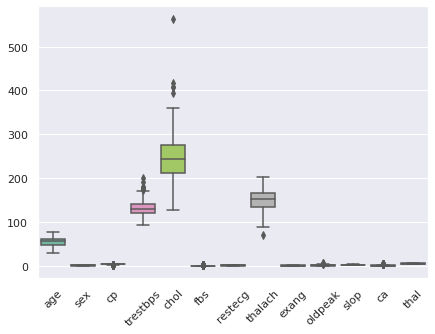

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

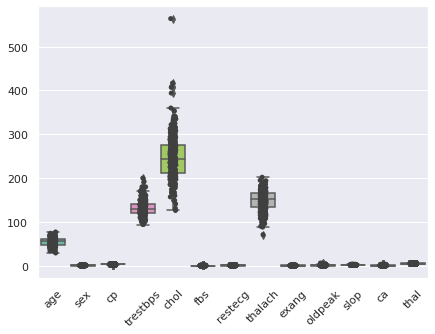

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


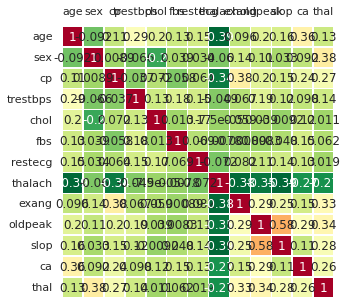

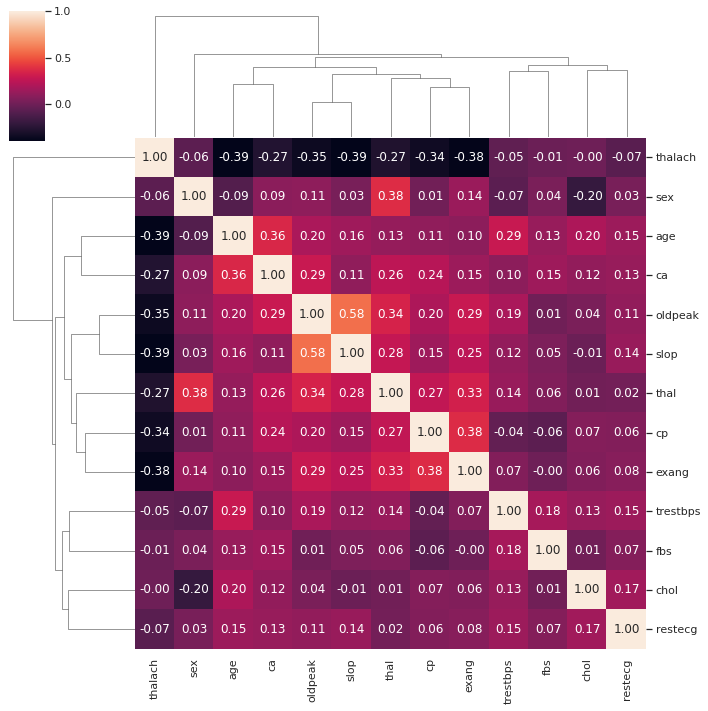

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

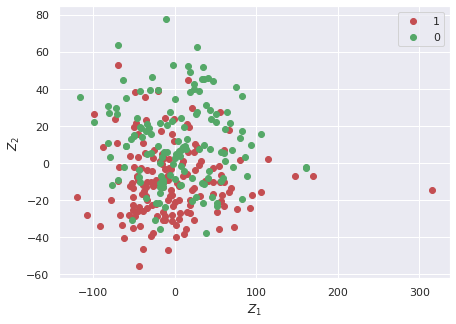

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='1')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='0')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

Eigenvector matrix:
[[ 3.71370255e-02  1.81679674e-01  1.26342886e-01  9.73933071e-01
  -1.62324935e-03 -1.25538251e-02  8.82183783e-03  7.10956392e-03
  -2.74850275e-02 -3.74275236e-03 -6.36506239e-03 -1.50926906e-04
  -2.57077245e-03]
 [-1.79005215e-03  1.06635004e-03 -1.32509632e-03 -4.68218868e-03
  -9.84310435e-02 -1.58885458e-02 -4.43554461e-02  6.27688820e-02
   6.91576268e-02 -3.31974793e-01 -7.07557366e-01 -5.99178738e-01
  -9.73699046e-02]
 [ 1.33755739e-03  1.36066367e-02 -5.61513121e-03 -5.21929355e-03
  -1.28686396e-01  1.34797679e-01 -2.06377805e-01 -8.25989043e-01
  -4.63195387e-01  6.90516043e-03  3.24012163e-02 -1.53887104e-01
   2.90735644e-02]
 [ 5.13057125e-02  1.15430612e-01  9.80273434e-01 -1.50661901e-01
   1.61828541e-02 -8.05788991e-03  2.76757810e-04 -8.01029623e-03
   1.09456675e-03 -5.32021900e-04 -1.00054923e-03 -2.11425047e-03
  -3.23656934e-03]
 [ 9.97979636e-01 -1.46608251e-02 -5.48624237e-02 -2.82558147e-02
   1.98559452e-04 -1.72626710e-03  2.49798523e

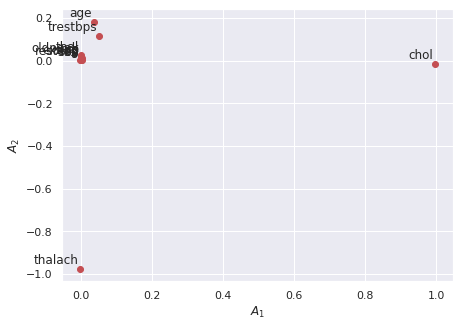

In [ ]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


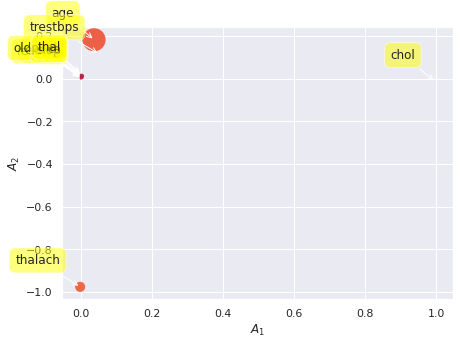

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Eigenvalues:
[2.71359986e+03 5.44679717e+02 3.11982229e+02 5.81900137e+01
 3.68389784e+00 1.20025688e+00 9.12001311e-01 8.07269560e-01
 6.41462337e-01 2.15556354e-01 1.72733897e-01 1.47649999e-01
 1.13363698e-01]


Text(0, 0.5, 'Explained variance')

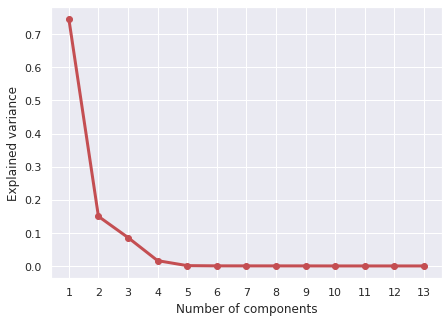

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(f'Eigenvalues:\n{Lambda}')
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

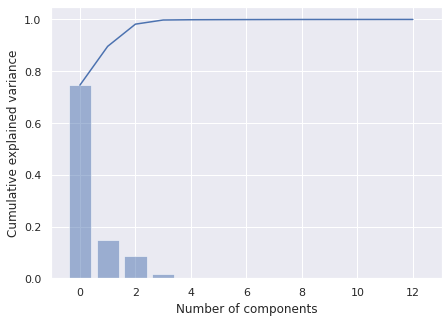

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

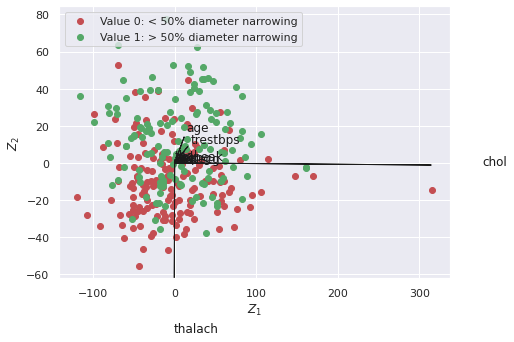

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Value 0: < 50% diameter narrowing')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Value 1: > 50% diameter narrowing')

plt.legend(loc='upper left')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


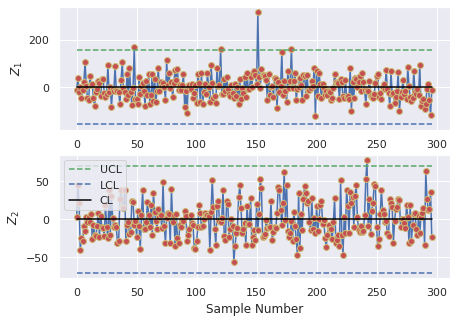

In [ ]:
# control chart
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (267, 14)
Unseen Data For Predictions: (30, 14)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='num', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target               num
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (267, 14)
5                           Missing Values             False
6                         Numeric Features                10
7                     Categorical Features                 3
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (186, 13)
12                    Transformed Test Set          (81, 13)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              850a
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8447  0.8825  0.7986  0.8698   
nb                            Naive Bayes    0.8401  0.8965  0.7986  0.8512   
ridge                    Ridge Classifier    0.8395  0.0000  0.7986  0.8531   
lda          Linear Discriminant Analysis    0.8395  0.8838  0.7986  0.8531   
rf               Random Forest Classifier    0.8023  0.8764  0.7764  0.8009   
gbc          Gradient Boosting Classifier    0.7854  0.8442  0.7764  0.7799   
et                 Extra Trees Classifier    0.7801  0.8855  0.7875  0.7606   
qda       Quadratic Discriminant Analysis    0.7798  0.8648  0.7875  0.7682   
lightgbm  Light Gradient Boosting Machine    0.7696  0.8528  0.7417  0.7712   
ada                  Ada Boost Classifier    0.7529  0.8018  0.7417  0.7483   
dt               Decision Tree Classifier    0.7161  0.7181  0.7194  0.7006   
knn                K Neighbors Classifier    0.6459  0.6933  0.6125  0.6561   
svm                   SVM - Linear Kernel    0.6304  0.0000  0.6000  0.6578   
dummy                    Dummy Classifier    0.5269  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8240  0.6871  0.6984     0.432  
nb        0.8191  0.6772  0.6837     0.011  
ridge     0.8192  0.6766  0.6843     0.010  
lda       0.8192  0.6766  0.6843     0.011  
rf        0.7845  0.6029  0.6084     0.452  
gbc       0.7721  0.5699  0.5787     0.066  
et        0.7690  0.5601  0.5681     0.411  
qda       0.7679  0.5594  0.5730     0.011  
lightgbm  0.7528  0.5371  0.5419     0.049  
ada       0.7344  0.5039  0.5137     0.079  
dt        0.7013  0.4327  0.4430     0.012  
knn       0.6200  0.2904  0.2993     0.110  
svm       0.5448  0.2654  0.3370     0.010  
dummy     0.0000  0.0000  0.0000     0.011

In [ ]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Logistic Regression ('LR')
* B.	Naïve Bayes ('NB')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.8667  0.6667  0.8571  0.7500  0.5730  0.5866
1       0.8421  0.8556  0.7778  0.8750  0.8235  0.6816  0.6854
2       0.8421  0.9333  0.7778  0.8750  0.8235  0.6816  0.6854
3       0.7895  0.8222  0.7778  0.7778  0.7778  0.5778  0.5778
4       0.7895  0.8111  0.5556  1.0000  0.7143  0.5682  0.6299
5       0.8947  0.9333  0.8889  0.8889  0.8889  0.7889  0.7889
6       0.8333  0.8500  0.8750  0.7778  0.8235  0.6667  0.6708
7       0.9444  1.0000  1.0000  0.8889  0.9412  0.8889  0.8944
8       0.7778  0.7901  0.6667  0.8571  0.7500  0.5556  0.5698
9       0.9444  0.9630  1.0000  0.9000  0.9474  0.8889  0.8944
Mean    0.8447  0.8825  0.7986  0.8698  0.8240  0.6871  0.6984
SD      0.0601  0.0669  0.1379  0.0599  0.0763  0.1219  0.1159

In [ ]:
#trained model object is stored in the variable 'dt'. 
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.8556  0.6667  0.8571  0.7500  0.5730  0.5866
1       0.8421  0.8667  0.7778  0.8750  0.8235  0.6816  0.6854
2       0.8421  0.9444  0.7778  0.8750  0.8235  0.6816  0.6854
3       0.8421  0.8222  0.8889  0.8000  0.8421  0.6851  0.6889
4       0.7895  0.8111  0.5556  1.0000  0.7143  0.5682  0.6299
5       0.8947  0.9333  0.8889  0.8889  0.8889  0.7889  0.7889
6       0.8333  0.8625  0.8750  0.7778  0.8235  0.6667  0.6708
7       0.9444  0.9875  1.0000  0.8889  0.9412  0.8889  0.8944
8       0.7222  0.7778  0.7778  0.7000  0.7368  0.4444  0.4472
9       0.9444  0.9630  1.0000  0.9000  0.9474  0.8889  0.8944
Mean    0.8444  0.8824  0.8208  0.8563  0.8291  0.6867  0.6972
SD      0.0661  0.0671  0.1327  0.0769  0.0764  0.1335  0.1290

In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_lr

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Naïve Bayes Model**

In [ ]:
nb = create_model('nb')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6316  0.7778  0.5556  0.6250  0.5882  0.2570  0.2584
1       0.8421  0.8667  0.8889  0.8000  0.8421  0.6851  0.6889
2       0.8947  0.9556  0.7778  1.0000  0.8750  0.7865  0.8051
3       0.7895  0.9000  0.7778  0.7778  0.7778  0.5778  0.5778
4       0.7368  0.8333  0.5556  0.8333  0.6667  0.4633  0.4893
5       0.7368  0.8778  0.7778  0.7000  0.7368  0.4751  0.4778
6       0.8333  0.8500  0.8750  0.7778  0.8235  0.6667  0.6708
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8333  0.8889  0.7778  0.8750  0.8235  0.6667  0.6708
9       0.8889  0.9630  0.8889  0.8889  0.8889  0.7778  0.7778
Mean    0.8187  0.8913  0.7875  0.8278  0.8023  0.6356  0.6417
SD      0.0969  0.0632  0.1347  0.1134  0.1111  0.1955  0.1946

**Tune Naïve Bayes Model**

In [ ]:
tuned_nb = tune_model(nb)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6316  0.7778  0.5556  0.6250  0.5882  0.2570  0.2584
1       0.8421  0.8667  0.8889  0.8000  0.8421  0.6851  0.6889
2       0.8947  0.9556  0.7778  1.0000  0.8750  0.7865  0.8051
3       0.7895  0.9000  0.7778  0.7778  0.7778  0.5778  0.5778
4       0.7368  0.8333  0.5556  0.8333  0.6667  0.4633  0.4893
5       0.7368  0.8778  0.7778  0.7000  0.7368  0.4751  0.4778
6       0.8333  0.8500  0.8750  0.7778  0.8235  0.6667  0.6708
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8333  0.8889  0.7778  0.8750  0.8235  0.6667  0.6708
9       0.8889  0.9630  0.8889  0.8889  0.8889  0.7778  0.7778
Mean    0.8187  0.8913  0.7875  0.8278  0.8023  0.6356  0.6417
SD      0.0969  0.0632  0.1347  0.1134  0.1111  0.1955  0.1946

**Evaluate Naïve Bayes Model**

In [ ]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9286  1.0000  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9698  0.9991  0.9700  0.9758  0.9695  0.9546  0.9577
SD      0.0370  0.0026  0.0371  0.0296  0.0374  0.0557  0.0519

In [ ]:
tuned_best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='num', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target               num
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (267, 14)
5                           Missing Values             False
6                         Numeric Features                10
7                     Categorical Features                 3
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (186, 3)
12                    Transformed Test Set           (81, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              8a4e
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8398  0.8891  0.8097  0.8558   
ridge                    Ridge Classifier    0.8398  0.0000  0.8097  0.8567   
lda          Linear Discriminant Analysis    0.8398  0.8905  0.8097  0.8567   
gbc          Gradient Boosting Classifier    0.8287  0.9036  0.8042  0.8327   
lightgbm  Light Gradient Boosting Machine    0.8246  0.8981  0.8444  0.8131   
nb                            Naive Bayes    0.8187  0.8913  0.7875  0.8278   
qda       Quadratic Discriminant Analysis    0.8187  0.8855  0.7875  0.8253   
et                 Extra Trees Classifier    0.8023  0.8989  0.7972  0.7953   
rf               Random Forest Classifier    0.7918  0.8950  0.7611  0.7958   
svm                   SVM - Linear Kernel    0.7915  0.0000  0.7708  0.8070   
knn                K Neighbors Classifier    0.7865  0.9001  0.7528  0.7909   
ada                  Ada Boost Classifier    0.7819  0.8743  0.7639  0.7780   
dt               Decision Tree Classifier    0.7807  0.7793  0.7819  0.7927   
dummy                    Dummy Classifier    0.5269  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8234  0.6777  0.6882     0.242  
ridge     0.8233  0.6777  0.6890     0.010  
lda       0.8233  0.6777  0.6890     0.011  
gbc       0.8096  0.6534  0.6654     0.059  
lightgbm  0.8204  0.6496  0.6622     0.050  
nb        0.8023  0.6356  0.6417     0.011  
qda       0.8004  0.6352  0.6424     0.011  
et        0.7880  0.6026  0.6129     0.401  
rf        0.7707  0.5803  0.5893     0.451  
svm       0.7690  0.5795  0.6025     0.010  
knn       0.7665  0.5702  0.5760     0.112  
ada       0.7623  0.5617  0.5719     0.078  
dt        0.7717  0.5605  0.5802     0.011  
dummy     0.0000  0.0000  0.0000     0.009

In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6842  0.7667  0.5556  0.7143  0.6250  0.3596  0.3680
1       0.8947  0.8778  0.8889  0.8889  0.8889  0.7889  0.7889
2       0.8947  0.9667  0.7778  1.0000  0.8750  0.7865  0.8051
3       0.7895  0.9000  0.7778  0.7778  0.7778  0.5778  0.5778
4       0.7895  0.8111  0.5556  1.0000  0.7143  0.5682  0.6299
5       0.7368  0.8778  0.7778  0.7000  0.7368  0.4751  0.4778
6       0.8333  0.8750  0.8750  0.7778  0.8235  0.6667  0.6708
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8333  0.8765  0.7778  0.8750  0.8235  0.6667  0.6708
9       0.9444  0.9630  1.0000  0.9000  0.9474  0.8889  0.8944
Mean    0.8401  0.8915  0.7986  0.8634  0.8212  0.6778  0.6884
SD      0.0909  0.0675  0.1466  0.1103  0.1069  0.1836  0.1807

In [ ]:
tuned_best_model_pca

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

In [ ]:
clf_pca = setup(data=data, target='num', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target               num
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (267, 14)
5                           Missing Values             False
6                         Numeric Features                10
7                     Categorical Features                 3
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (186, 3)
12                    Transformed Test Set           (81, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              c428
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()


Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8398  0.8891  0.8097  0.8558   
ridge                    Ridge Classifier    0.8398  0.0000  0.8097  0.8567   
lda          Linear Discriminant Analysis    0.8398  0.8905  0.8097  0.8567   
gbc          Gradient Boosting Classifier    0.8287  0.9036  0.8042  0.8327   
lightgbm  Light Gradient Boosting Machine    0.8246  0.8981  0.8444  0.8131   
nb                            Naive Bayes    0.8187  0.8913  0.7875  0.8278   
qda       Quadratic Discriminant Analysis    0.8187  0.8855  0.7875  0.8253   
et                 Extra Trees Classifier    0.8023  0.8989  0.7972  0.7953   
rf               Random Forest Classifier    0.7918  0.8950  0.7611  0.7958   
svm                   SVM - Linear Kernel    0.7915  0.0000  0.7708  0.8070   
knn                K Neighbors Classifier    0.7865  0.9001  0.7528  0.7909   
ada                  Ada Boost Classifier    0.7819  0.8743  0.7639  0.7780   
dt               Decision Tree Classifier    0.7807  0.7793  0.7819  0.7927   
dummy                    Dummy Classifier    0.5269  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8234  0.6777  0.6882     0.013  
ridge     0.8233  0.6777  0.6890     0.010  
lda       0.8233  0.6777  0.6890     0.014  
gbc       0.8096  0.6534  0.6654     0.061  
lightgbm  0.8204  0.6496  0.6622     0.088  
nb        0.8023  0.6356  0.6417     0.011  
qda       0.8004  0.6352  0.6424     0.011  
et        0.7880  0.6026  0.6129     0.536  
rf        0.7707  0.5803  0.5893     0.453  
svm       0.7690  0.5795  0.6025     0.010  
knn       0.7665  0.5702  0.5760     0.115  
ada       0.7623  0.5617  0.5719     0.080  
dt        0.7717  0.5605  0.5802     0.012  
dummy     0.0000  0.0000  0.0000     0.017

**Tuning Naïve Bayes model**

In [ ]:
tuned_nb = tune_model(nb)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6316  0.7778  0.5556  0.6250  0.5882  0.2570  0.2584
1       0.8421  0.8667  0.8889  0.8000  0.8421  0.6851  0.6889
2       0.8947  0.9556  0.7778  1.0000  0.8750  0.7865  0.8051
3       0.7895  0.9000  0.7778  0.7778  0.7778  0.5778  0.5778
4       0.7368  0.8333  0.5556  0.8333  0.6667  0.4633  0.4893
5       0.7368  0.8778  0.7778  0.7000  0.7368  0.4751  0.4778
6       0.8333  0.8500  0.8750  0.7778  0.8235  0.6667  0.6708
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8333  0.8889  0.7778  0.8750  0.8235  0.6667  0.6708
9       0.8889  0.9630  0.8889  0.8889  0.8889  0.7778  0.7778
Mean    0.8187  0.8913  0.7875  0.8278  0.8023  0.6356  0.6417
SD      0.0969  0.0632  0.1347  0.1134  0.1111  0.1955  0.1946

**Evaluating Naïve Bayes model**

In [ ]:
evaluate_model(nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…